In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [23]:
# Cargar el dataset
data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [24]:
# Data preprocessing
# Check for missing values
data = data.dropna()

In [25]:
# Encode categorical variables (if necessary)
data = pd.get_dummies(data, dtype=int)

In [26]:
# show the firts line
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [27]:
data.keys()

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [29]:
# drop unnamed colunm
data = data.drop('Unnamed: 0', axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [30]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [32]:
# Define predictor variables (X) and target variable (y)
X = data.drop('Sales', axis=1)  # Make sure 'Sales' is the correct target column name
y = data['Sales']

In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predictions
y_pred = model.predict(X_test)

In [36]:
# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [38]:
# visualizations
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 1.4607567168117603
Mean Squared Error: 3.1740973539761033
R-squared: 0.899438024100912


In [44]:
# Correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


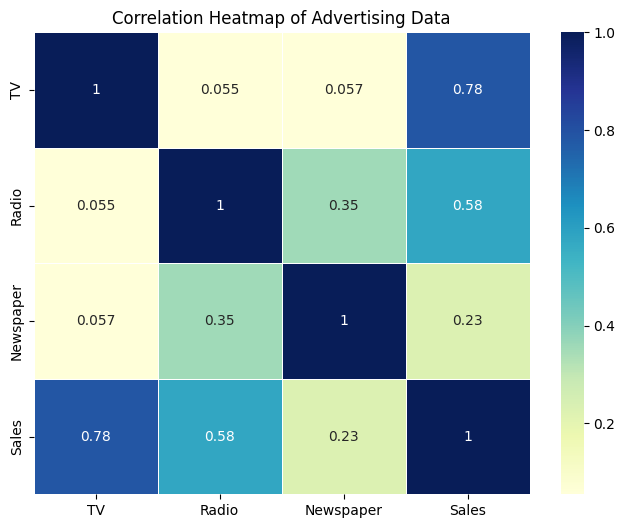

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Heatmap of Advertising Data')
plt.show()

In [46]:
import pickle
pickle.dump(model, open('modeladvertising.pkl', 'wb')) # Save the trained model to a file